# HR Analytics – Employee Attrition project

    Problem: High employee attrition increases business costs.
    Goal: Build a predictive model to identify at-risk employees.

## Reading the Data

In [56]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
# read dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [62]:
# Separate categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Separate numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("_____________________________________________________________________________")
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
_____________________________________________________________________________
Numerical Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [64]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [66]:
for col in categorical_cols:
    print(f"\n Column: {col}")
    print("Unique Values:", df[col].unique())
    print("Value Counts:\n", df[col].value_counts())


 Column: Attrition
Unique Values: ['Yes' 'No']
Value Counts:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64

 Column: BusinessTravel
Unique Values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Value Counts:
 BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

 Column: Department
Unique Values: ['Sales' 'Research & Development' 'Human Resources']
Value Counts:
 Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

 Column: EducationField
Unique Values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Value Counts:
 EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

 Column: Gender
Unique Values: ['Female' 'Male']
Value Counts:
 Gender
Male      882
Female   

## VISUALIZE DATASET

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

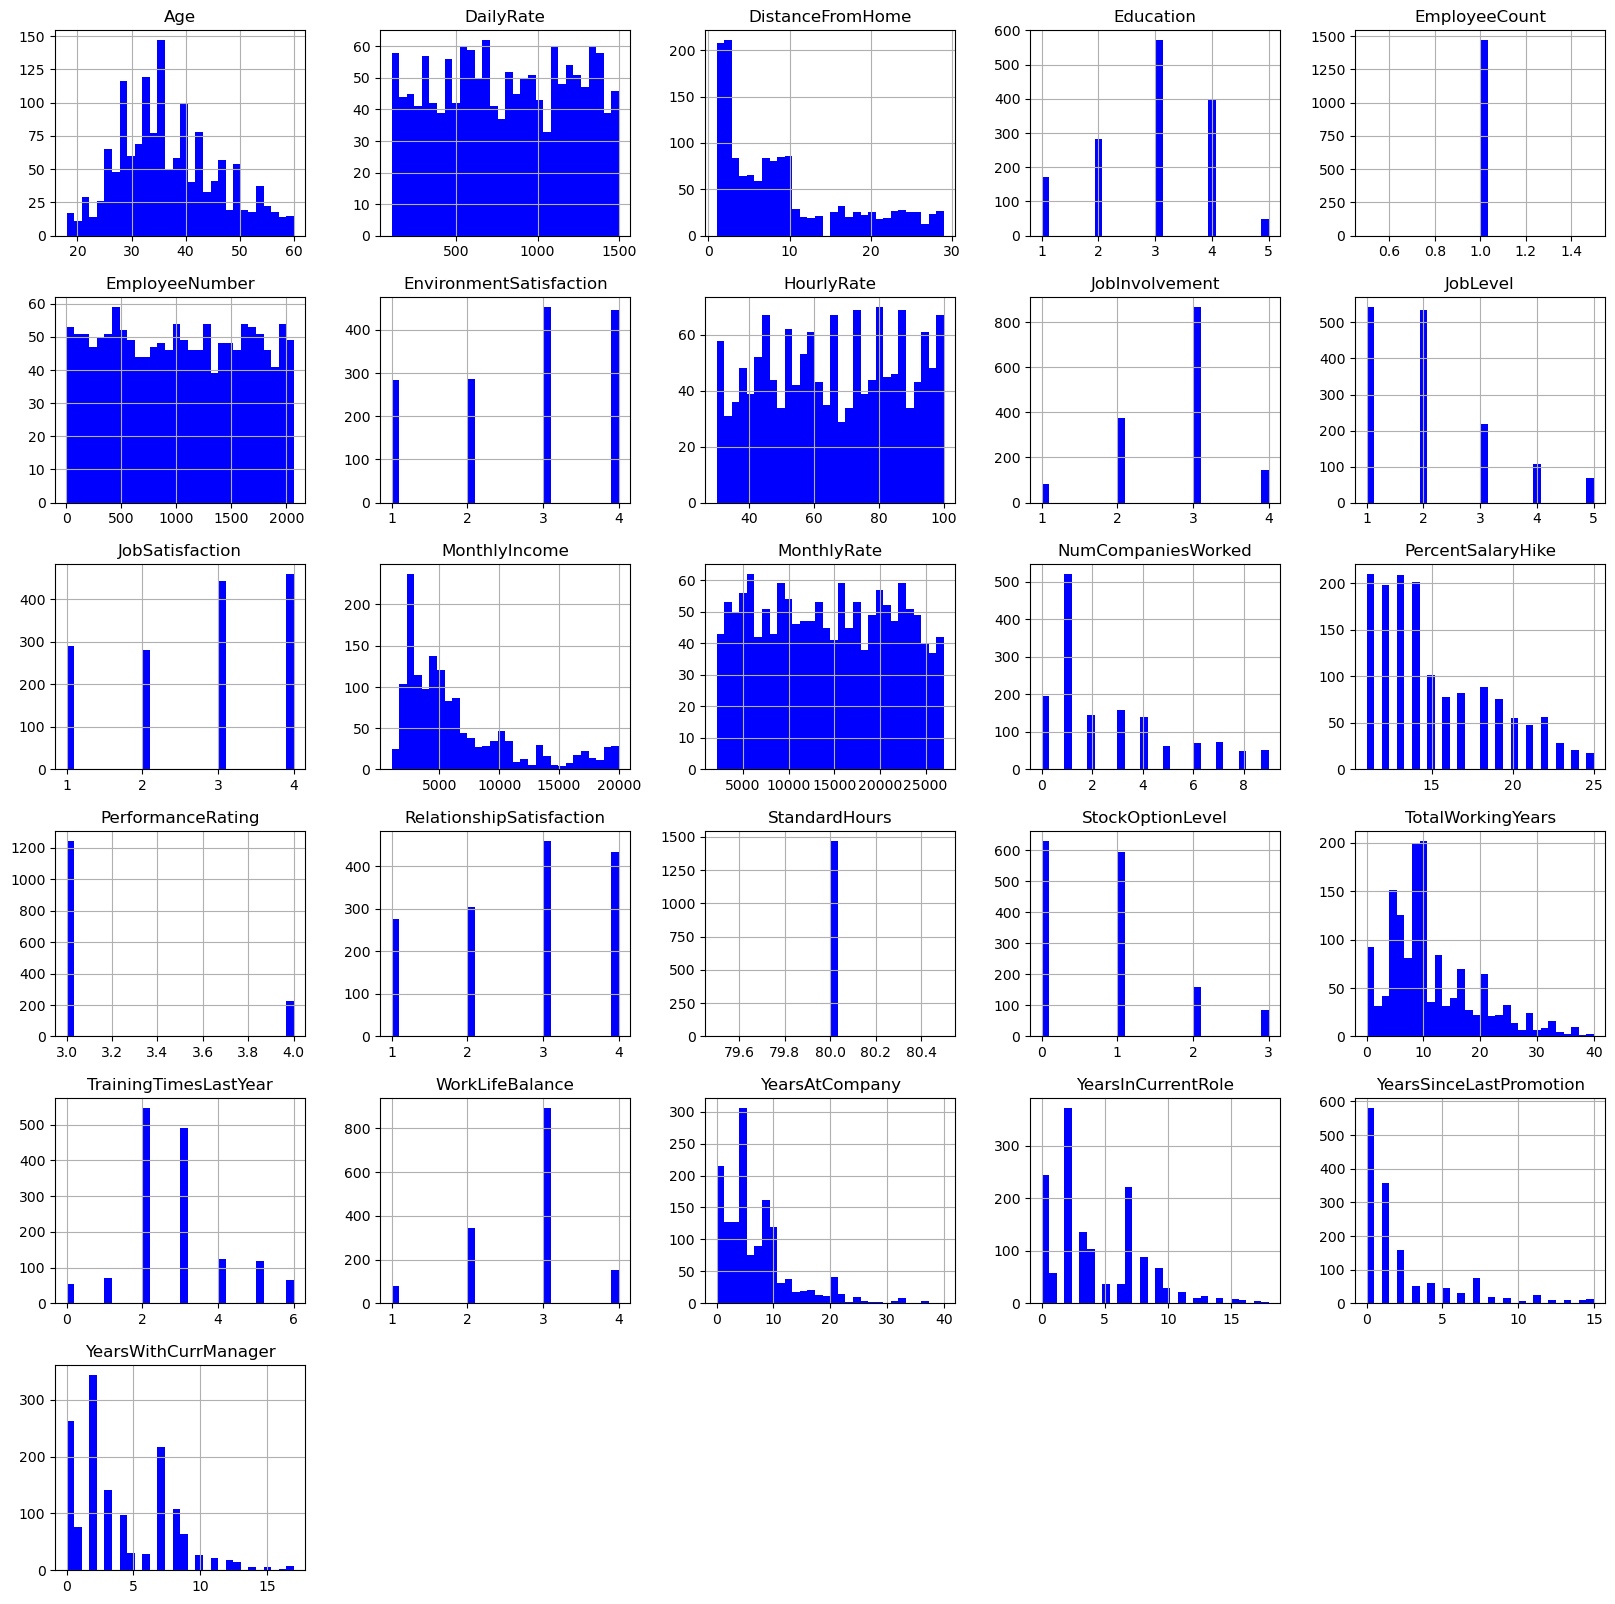

In [69]:
# visulizaing data distribution using histogram plot. 
df.hist(bins = 30, figsize = (20,20), color = 'b')


In [70]:
 # Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# Wecan drop 'EmployeeCount' and 'Standardhours' astey are constant for all employees

<Axes: >

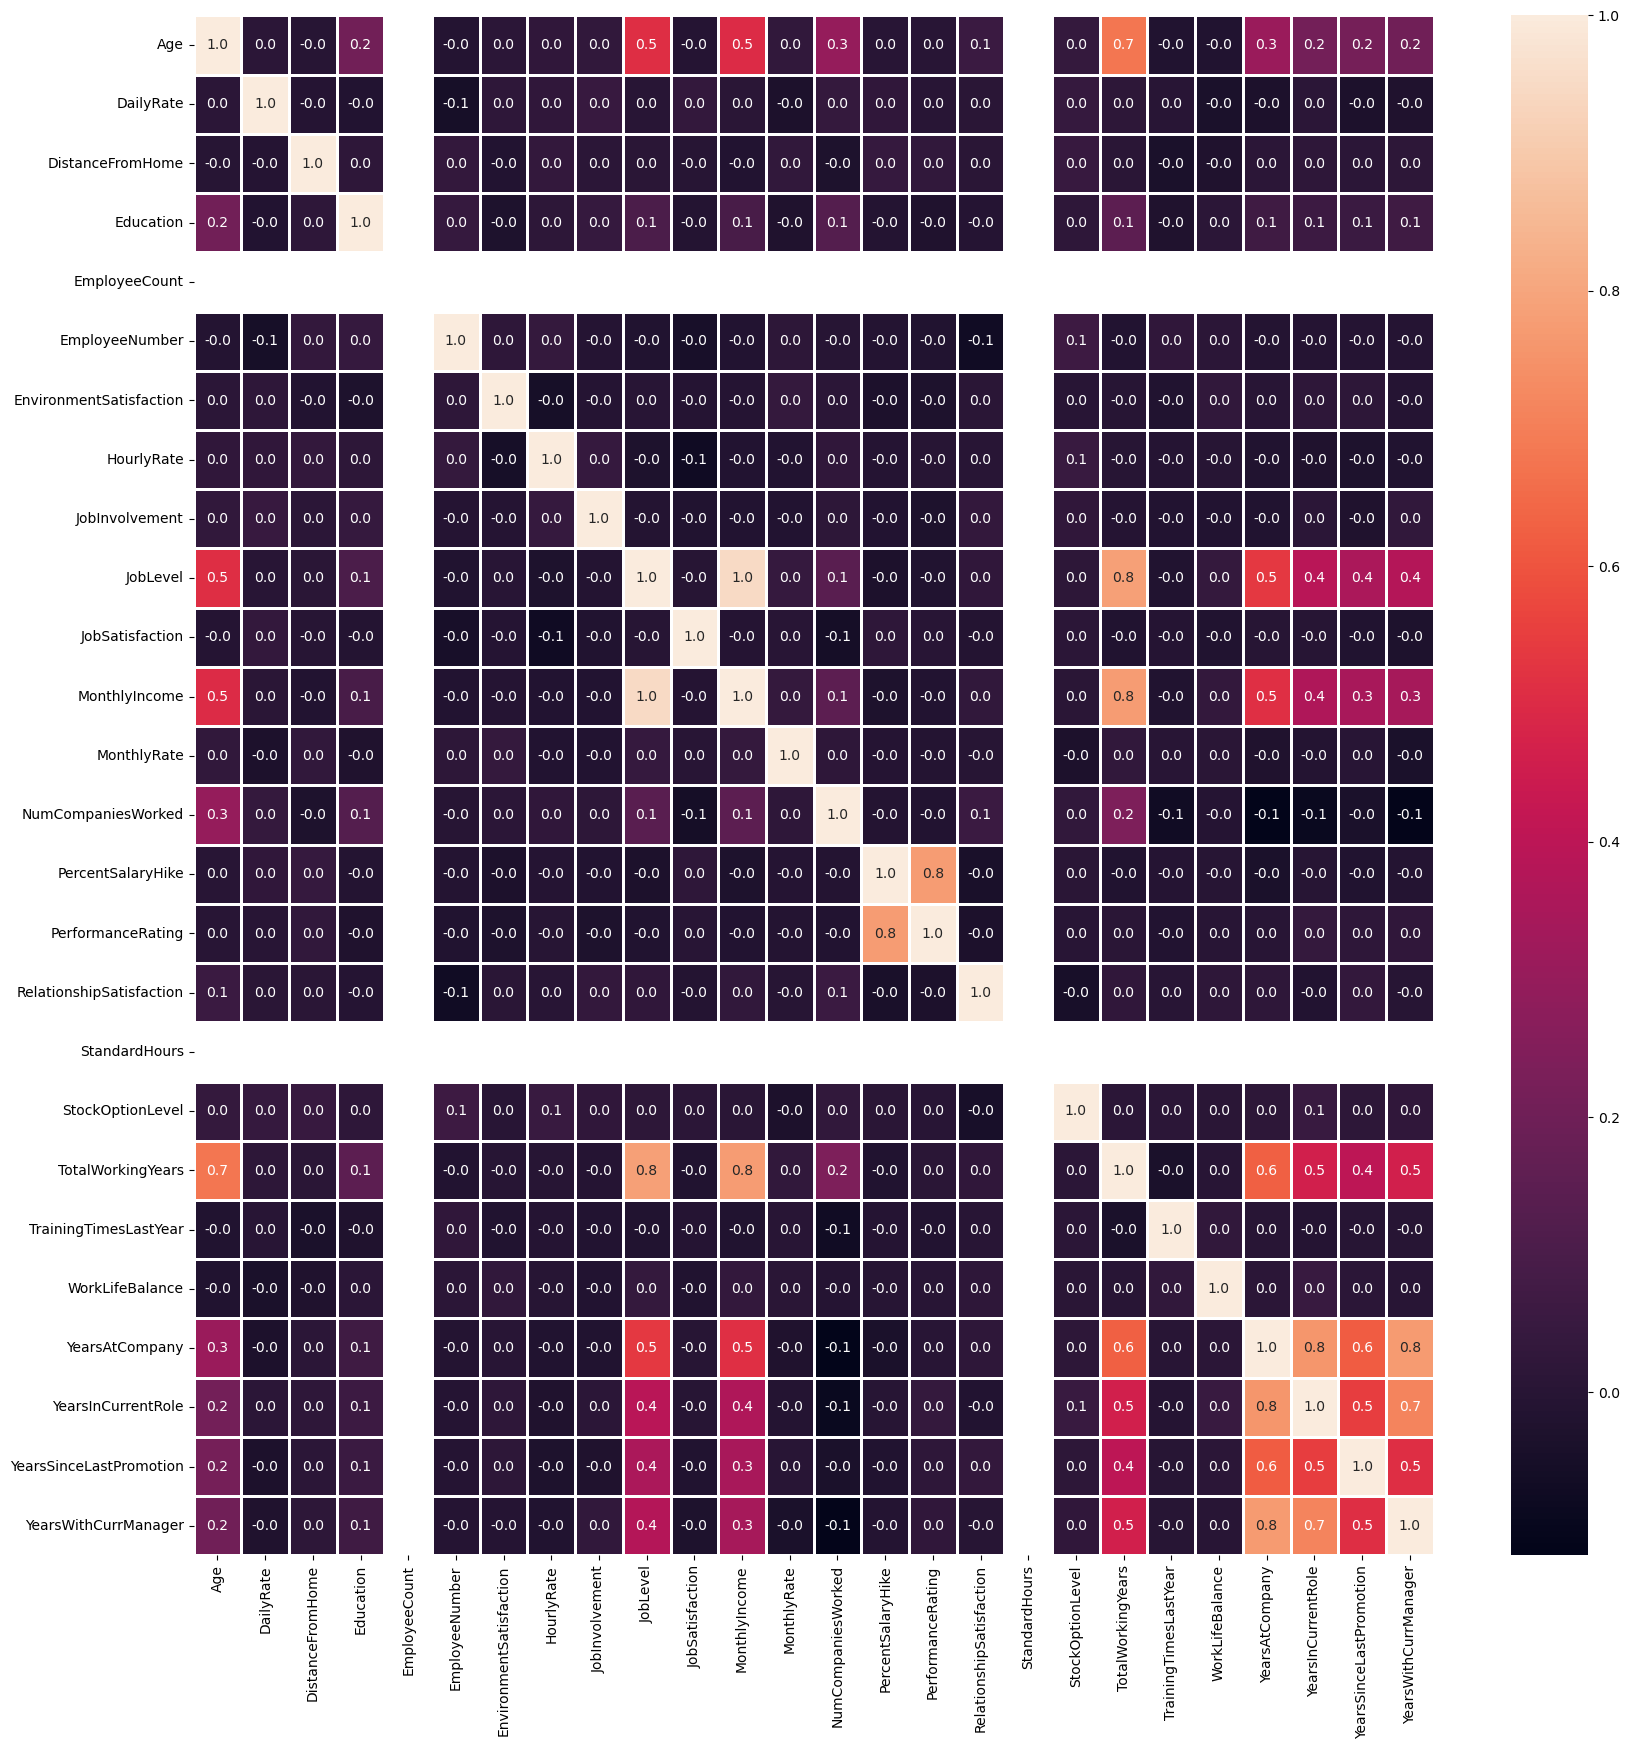

In [71]:
# let's see the correlation between numeric features
numeric_features = df.select_dtypes(include = [np.number])

correlations = numeric_features .corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True, linewidths = 2, fmt = '.1f', ax=ax)

- **Job Level shows a strong positive correlation with Total Working Years**, indicating that as employees accumulate more experience, they tend to move up the organizational hierarchy.

- **Monthly Income is highly correlated with both Job Level and Total Working Years**, reflecting the typical structure where compensation increases with seniority and experience.

- **Age exhibits a significant correlation with Monthly Income**, suggesting that older employees generally earn more—likely due to accumulated experience and higher positions within the company.


## Data Cleaning & Preprocessing

In [78]:
# Column: Over18 has Unique Values: ['Y'] which is same for all the rows, ence drop the column

df.drop('Over18', axis=1, inplace= True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [80]:
#'EmployeeCount' , 'Standardhours' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well, not needed 
df.drop(['EmployeeCount', 'StandardHours',  'EmployeeNumber'], axis=1, inplace=True)

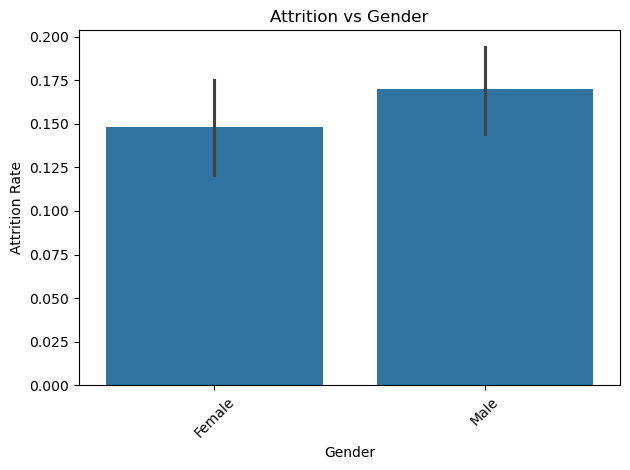

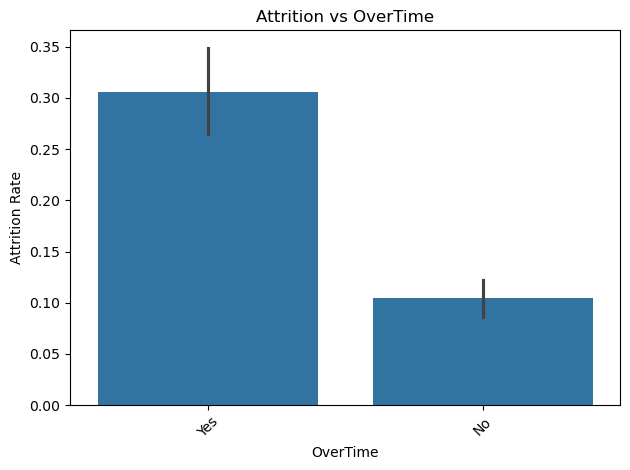

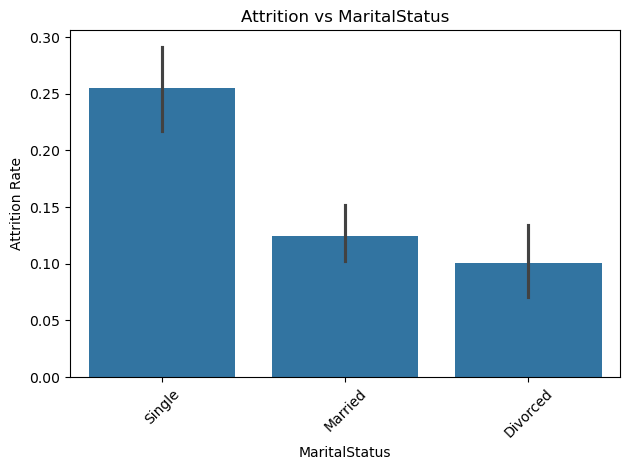

In [82]:
categorical_cols = ['Gender', 'OverTime', 'MaritalStatus']

for col in categorical_cols:
    # Add temporary attrition column using assign
    temp_df = df.assign(attrition_eda=df['Attrition'].map({'Yes': 1, 'No': 0}))
    
    sns.barplot(x=col, y='attrition_eda', data=temp_df)
    plt.title(f'Attrition vs {col}')
    plt.ylabel('Attrition Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


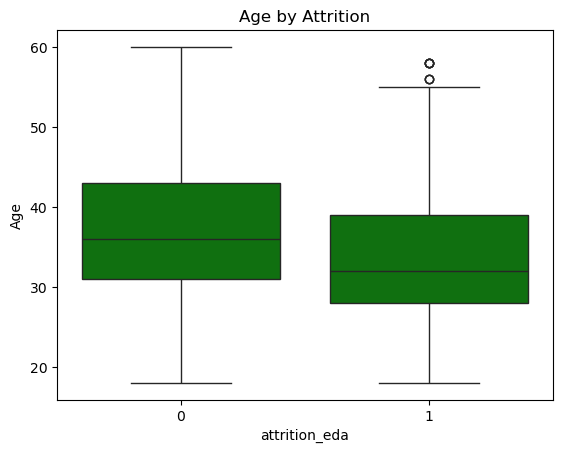

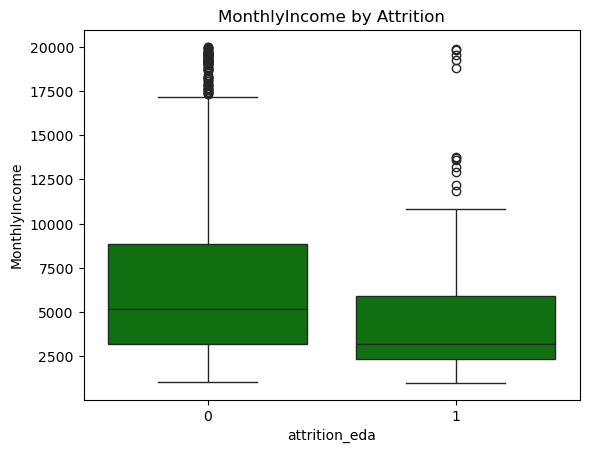

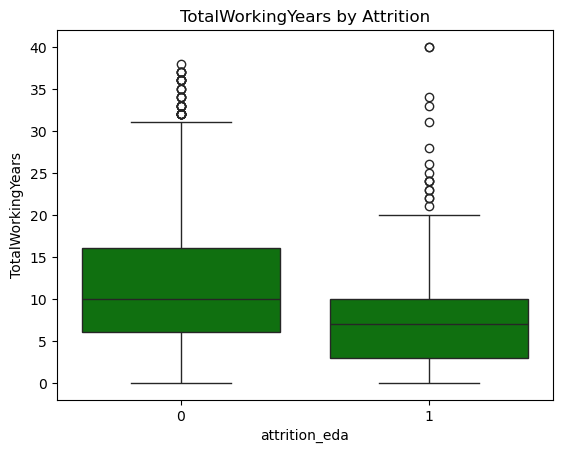

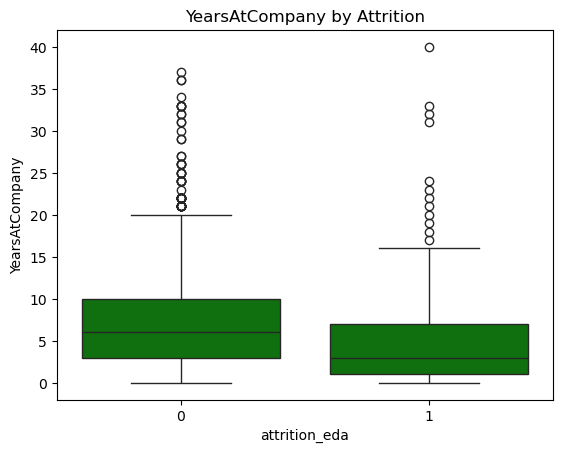

In [83]:
# Attrition vs continuous features (boxplots)
continuous = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']
for col in continuous:
    temp_df = df.assign(attrition_eda=df['Attrition'].map({'Yes': 1, 'No': 0}))

    sns.boxplot(x='attrition_eda', y=col, color= 'green', data=temp_df)
    plt.title(f'{col} by Attrition')
    plt.show()

## Label encoding

In [87]:
le_cols = ['Attrition', 'Gender', 'OverTime']
ohe_cols = ['BusinessTravel', 'Department', 'MaritalStatus']
be_cols = ['JobRole', 'EducationField']

In [89]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [90]:
# Label Encoding
le = LabelEncoder()
for col in le_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding
df = pd.get_dummies(df, columns=ohe_cols, dtype = int, drop_first=True)

# Binary Encoding
be = ce.BinaryEncoder(cols=be_cols)
df = be.fit_transform(df)

In [91]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField_0,EducationField_1,EducationField_2,EnvironmentSatisfaction,Gender,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,0,0,1,2,0,...,6,4,0,5,0,1,0,1,0,1
1,49,0,279,8,1,0,0,1,3,1,...,10,7,1,7,1,0,1,0,1,0
2,37,1,1373,2,2,0,1,0,4,1,...,0,0,0,0,0,1,1,0,0,1
3,33,0,1392,3,4,0,0,1,4,0,...,8,7,3,0,1,0,1,0,1,0
4,27,0,591,2,1,0,1,1,1,1,...,2,2,2,2,0,1,1,0,1,0


## feature scaling

In [94]:
scaling_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

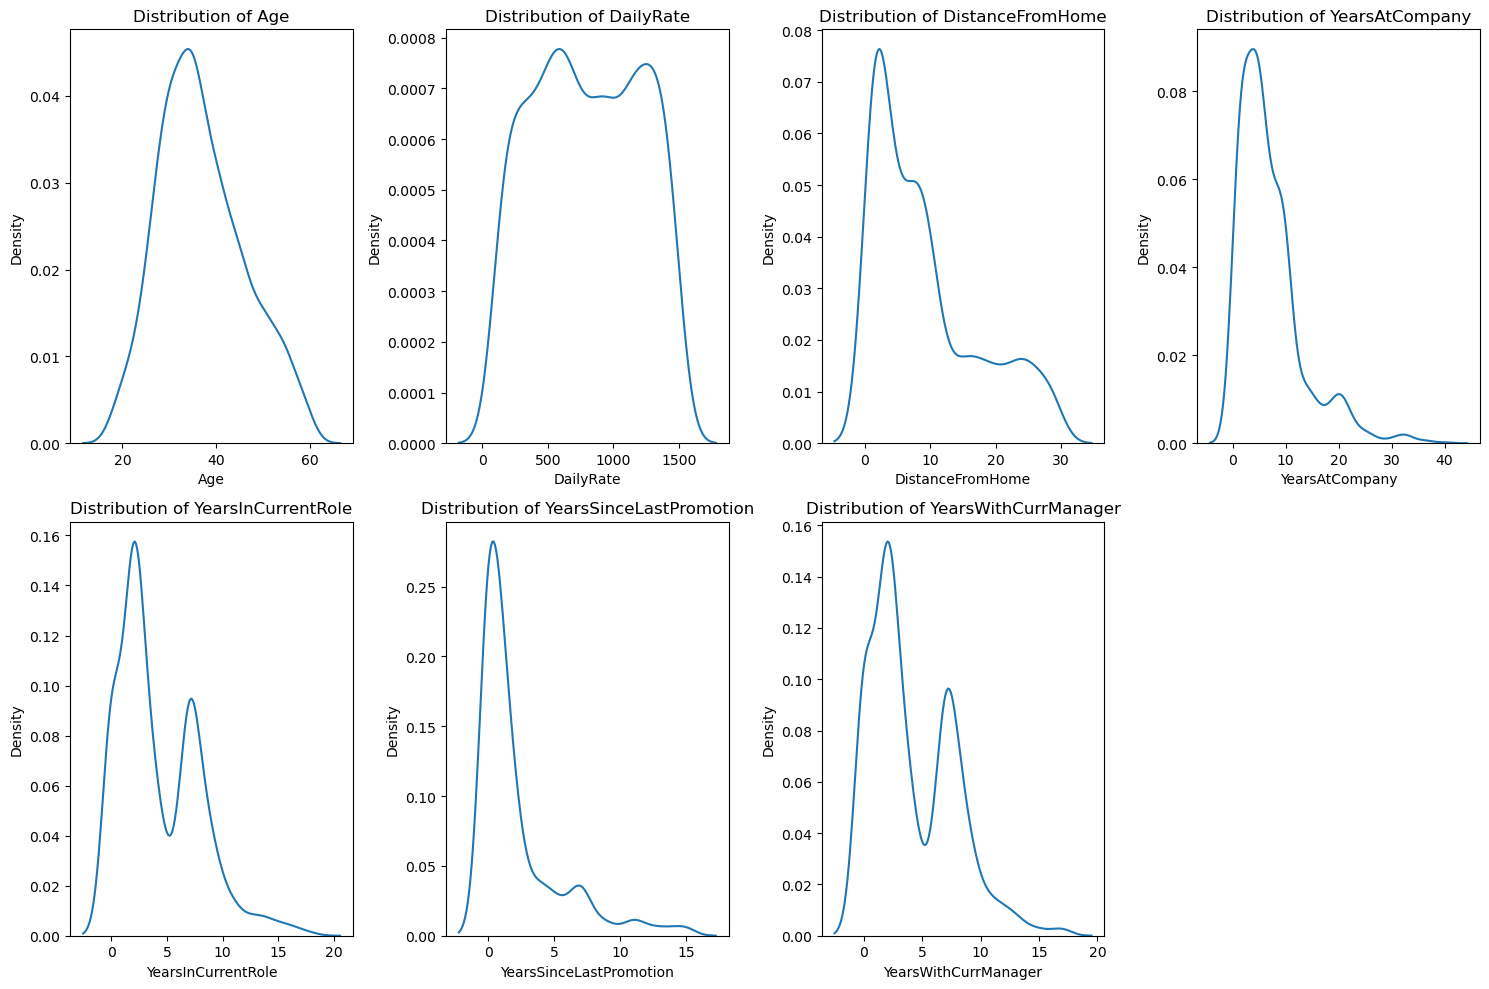

In [95]:
# Function to plot distribution before imputation

def plot_distribution(data, cols):
    plt.figure(figsize=(15,10))
    for i,col in enumerate(cols):
        plt.subplot(2, 4, i + 1)
        sns.kdeplot(df[col])
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()

plot_distribution(df, scaling_cols)

    As most of the features are not normal, Age is nearly normal. Hence, we will go with Normalization for scaling the features.

# Feature Scaling (normalization)

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
# normalization

# initialize
scaler = MinMaxScaler()
df[scaling_cols] = scaler.fit_transform(df[scaling_cols])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField_0,EducationField_1,EducationField_2,EnvironmentSatisfaction,Gender,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,1,0.715820,0.000000,2,0,0,1,2,0,...,0.15,0.222222,0.000000,0.294118,0,1,0,1,0,1
1,0.738095,0,0.126700,0.250000,1,0,0,1,3,1,...,0.25,0.388889,0.066667,0.411765,1,0,1,0,1,0
2,0.452381,1,0.909807,0.035714,2,0,1,0,4,1,...,0.00,0.000000,0.000000,0.000000,0,1,1,0,0,1
3,0.357143,0,0.923407,0.071429,4,0,0,1,4,0,...,0.20,0.388889,0.200000,0.000000,1,0,1,0,1,0
4,0.214286,0,0.350036,0.035714,1,0,1,1,1,1,...,0.05,0.111111,0.133333,0.117647,0,1,1,0,1,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   int32  
 2   DailyRate                          1470 non-null   float64
 3   DistanceFromHome                   1470 non-null   float64
 4   Education                          1470 non-null   int64  
 5   EducationField_0                   1470 non-null   int64  
 6   EducationField_1                   1470 non-null   int64  
 7   EducationField_2                   1470 non-null   int64  
 8   EnvironmentSatisfaction            1470 non-null   int64  
 9   Gender                             1470 non-null   int32  
 10  HourlyRate                         1470 non-null   int64  
 11  JobInvolvement                     1470 non-null   int64

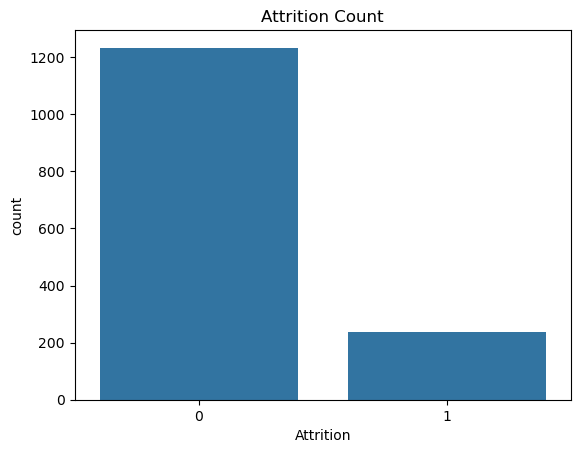

In [104]:
# Distribution of target variable
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

In [105]:
df.Attrition.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

# Imbalanced data
    Total = 1470
    Number of employees who left the company = 237
    
    Number of employees who did not leave the company (stayed) = 1233

In [113]:
#splitting the data

x = df.drop('Attrition', axis=1)  # independent features
y = df.Attrition                   # dependent feature

### Train test split

In [116]:
from sklearn.model_selection import train_test_split

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Balance Training Data

In [121]:
df.Attrition.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [123]:
from imblearn.over_sampling import SMOTE

In [138]:
# Instantiate SMOTE
smt = SMOTE(sampling_strategy='minority')

# Resample training data

x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)


_________________________________________________________________________________________
# Model Building
_________________________________________________________________________________________

# Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression

In [399]:
LR = LogisticRegression()

LR.fit(x_train_smt, y_train_smt)

LogisticRegression()

In [400]:
# Predict on the balanced TEST set
y_pred_test_lr = LR.predict(x_test)
y_pred_train_lr = LR.predict(x_train)


In [403]:
y_pred_test_lr

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0])

In [405]:
# Evaluation of the logistic regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [407]:
print('Testing Accuracy score is: ', accuracy_score(y_test, y_pred_test_lr))
print('Training Accuracy score is: ', accuracy_score(y_train, y_pred_train_lr))


Testing Accuracy score is:  0.7448979591836735
Training Accuracy score is:  0.7159863945578231


In [409]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test_lr))
print('Classification Report:\n', classification_report(y_test, y_pred_test_lr))

Confusion Matrix:
 [[204  51]
 [ 24  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       255
           1       0.23      0.38      0.29        39

    accuracy                           0.74       294
   macro avg       0.56      0.59      0.57       294
weighted avg       0.81      0.74      0.77       294



## KNN Classifier

In [463]:
from sklearn.neighbors import KNeighborsClassifier

In [477]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(x_train_smt, y_train_smt)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [503]:
y_pred_knn = knn.predict(x_test)
y_pred_train_knn = knn.predict(x_train)

In [505]:
print("KNN Accuracy:",accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.6632653061224489


In [461]:
from sklearn.model_selection import RandomizedSearchCV


param_grid = {
    'n_neighbors': range(1, 15),  # Testing values from 1 to 15
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


random_search = RandomizedSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1)
random_search.fit(x_train_smt, y_train_smt)


RandomizedSearchCV(cv=5,
                   estimator=KNeighborsClassifier(n_neighbors=3,
                                                  weights='distance'),
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 15),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [485]:
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Best Parameters: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
Best Accuracy: 0.7740474450649825


In [495]:
# Retrain KNN 
KNN = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan')

# Fit the model on training data
KNN.fit(x_train_smt, y_train_smt)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [497]:
# Make predictions on the test set
y_pred_KNN = KNN.predict(x_test)

In [499]:
from sklearn.metrics import accuracy_score
# Evaluate accuracy
tuned_accuracy = accuracy_score(y_test, y_pred_KNN)
print("Tuned KNN Accuracy:", tuned_accuracy)

Tuned KNN Accuracy: 0.6156462585034014


## Decision Tree Classifier

In [227]:
from sklearn.tree import DecisionTreeClassifier

In [229]:
dt = DecisionTreeClassifier()
dt.fit(x_train_smt, y_train_smt)

DecisionTreeClassifier()

In [231]:
y_pred_test_dt = dt.predict(x_test)

In [233]:
print('Accuracy Score:', accuracy_score(y_test, y_pred_test_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_test_dt))

Accuracy Score: 0.7789115646258503
Confusion Matrix:
 [[213  42]
 [ 23  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       255
           1       0.28      0.41      0.33        39

    accuracy                           0.78       294
   macro avg       0.59      0.62      0.60       294
weighted avg       0.82      0.78      0.80       294



## Hyperparameter tunning

In [289]:
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5,6,7,11,12,15],
    'max_features' : ["auto", "sqrt", "log2"]
}

In [291]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

treemodel = DecisionTreeClassifier()

gscv = GridSearchCV(treemodel, param_grid= params, cv = 5, scoring= 'accuracy')

gscv.fit(x_train_smt, y_train_smt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 11, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [293]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'splitter': 'best'}

In [295]:
DT = DecisionTreeClassifier(criterion= 'gini', max_depth= 15, max_features= 'log2', splitter= 'best')

In [297]:
DT.fit(x_train_smt, y_train_smt)

DecisionTreeClassifier(max_depth=15, max_features='log2')

In [299]:
# Prediction 

y_pred_train_DT = DT.predict(x_train_smt)

y_pred_test_DT = DT.predict(x_test)

In [301]:
print(f'Training Accuracy {accuracy_score(y_train_smt, y_pred_train_DT)}')
print(f'Testing Accuracy {accuracy_score(y_test, y_pred_test_DT )}')

Training Accuracy 0.9979550102249489
Testing Accuracy 0.7210884353741497


In [303]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test_DT))
print('Classification Report:\n', classification_report(y_test, y_pred_test_DT))

Confusion Matrix:
 [[198  57]
 [ 25  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       255
           1       0.20      0.36      0.25        39

    accuracy                           0.72       294
   macro avg       0.54      0.57      0.54       294
weighted avg       0.80      0.72      0.75       294



## Random Forest Classifier

In [372]:
from sklearn.ensemble import RandomForestClassifier

In [374]:
rf = RandomForestClassifier()

In [376]:
rf.fit(x_train_smt, y_train_smt)

RandomForestClassifier()

In [377]:
y_pred_rf = rf.predict(x_test)
y_pred_train_rf = rf.predict(x_train)

In [378]:
print('Accuracy Score Testing:', accuracy_score(y_test, y_pred_rf))
print('Accuracy Score Training:', accuracy_score(y_train, y_pred_train_rf))

Accuracy Score Testing: 0.8707482993197279
Accuracy Score Training: 1.0


## Hyperparameter tunning

In [383]:
params = { 
    'n_estimators' : [100,200,300],
    'criterion' : ['gini','entropy'],
    'max_depth' : [5,10,15,None],
    'min_samples_split':np.arange(2,10),
    'min_samples_leaf' : np.arange(1,10)
}

In [397]:
#rf_gscv = GridSearchCV(rf, param_grid= params)

In [ ]:
#rf_gscv.fit(x_train_smt, y_train_smt)

In [ ]:
#rf_gscv.best_params_

In [ ]:
#RF = RandomForestClassifier(n_estimators = 100, criterion='gini', max_depth = 15, min_samples_split = 8, min_samples_leaf = 2)

In [ ]:
#RF.fit(x_train_smt, y_train_smt)

In [ ]:
#y_pred_test_RF = RF.predict(x_test_smt)

## AdaBoost Classifier

In [320]:
from sklearn.ensemble import AdaBoostClassifier

In [322]:
base_est = DecisionTreeClassifier(random_state=42)

In [324]:
# define base estimator (decision stump)
abc = AdaBoostClassifier(estimator= base_est, random_state=42)

abc.fit(x_train_smt, y_train_smt)

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                   random_state=42)

In [326]:
y_pred_test_abc = abc.predict(x_test)
y_pred_train_abc = abc.predict(x_train)

In [328]:
## Evaluation parameters
print('Testing Accuracy Score:', accuracy_score(y_test, y_pred_test_abc))
print('Training Accuracy Score:', accuracy_score(y_train, y_pred_train_abc))

Testing Accuracy Score: 0.8061224489795918
Training Accuracy Score: 1.0


## Hyperparameter tunning

In [331]:
# Define parameter grid
params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
}


In [333]:
treemodel = AdaBoostClassifier()

# GridSearchCV

gscv = GridSearchCV(estimator=treemodel, param_grid=params, cv=5, scoring='accuracy', verbose=1)


In [335]:
gscv.fit(x_train_smt, y_train_smt)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [337]:
gscv.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [339]:
# Retrain final model
ABC = AdaBoostClassifier(learning_rate= 1, n_estimators= 100, random_state=42)

ABC.fit(x_train_smt, y_train_smt)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=42)

In [347]:
# Predict on test data
y_pred_ABC = ABC.predict(x_test)
y_pred_train_ABC = ABC.predict(x_train)

In [351]:
# Evaluate

print('Testing Accuracy:', accuracy_score(y_test, y_pred_ABC))
print('Training Accuracy:', accuracy_score(y_train, y_pred_train_ABC))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_ABC))
print('Classification Report:\n', classification_report(y_test, y_pred_ABC))


Testing Accuracy: 0.8401360544217688
Training Accuracy: 0.8579931972789115
Confusion Matrix:
 [[225  30]
 [ 17  22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       255
           1       0.42      0.56      0.48        39

    accuracy                           0.84       294
   macro avg       0.68      0.72      0.69       294
weighted avg       0.86      0.84      0.85       294



## GradientBoosting Classifier

In [354]:
from sklearn.ensemble import GradientBoostingClassifier

In [356]:
# Instantiate model
gb = GradientBoostingClassifier()

# Fit the model
gb.fit(x_train_smt, y_train_smt)

GradientBoostingClassifier()

In [275]:
y_pred_gb = gb.predict(x_test)
y_pred_train_gb = gb.predict(x_train)


In [358]:
# Evaluation parameters
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_train, y_pred_train_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Accuracy: 0.8639455782312925
Accuracy: 0.9345238095238095

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       255
           1       0.48      0.38      0.43        39

    accuracy                           0.86       294
   macro avg       0.70      0.66      0.68       294
weighted avg       0.85      0.86      0.86       294


Confusion Matrix:
 [[239  16]
 [ 24  15]]



Confusion Matrix:



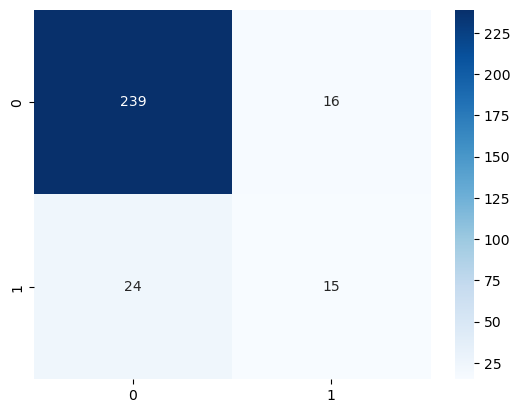

In [360]:
print("\nConfusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.show()

## XGBoost

In [362]:
import xgboost as xgb

In [364]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(x_train_smt, y_train_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [366]:
# Predictions
y_pred_xgb = xgb.predict(x_test)
y_pred_train_xgb = xgb.predict(x_train)

In [368]:
# Evaluation parameters
print("Testing Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Testing Accuracy: 0.8741496598639455
Training Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.55      0.31      0.39        39

    accuracy                           0.87       294
   macro avg       0.72      0.63      0.66       294
weighted avg       0.85      0.87      0.86       294


Confusion Matrix:
 [[245  10]
 [ 27  12]]


## Model Comparison and Interpretation

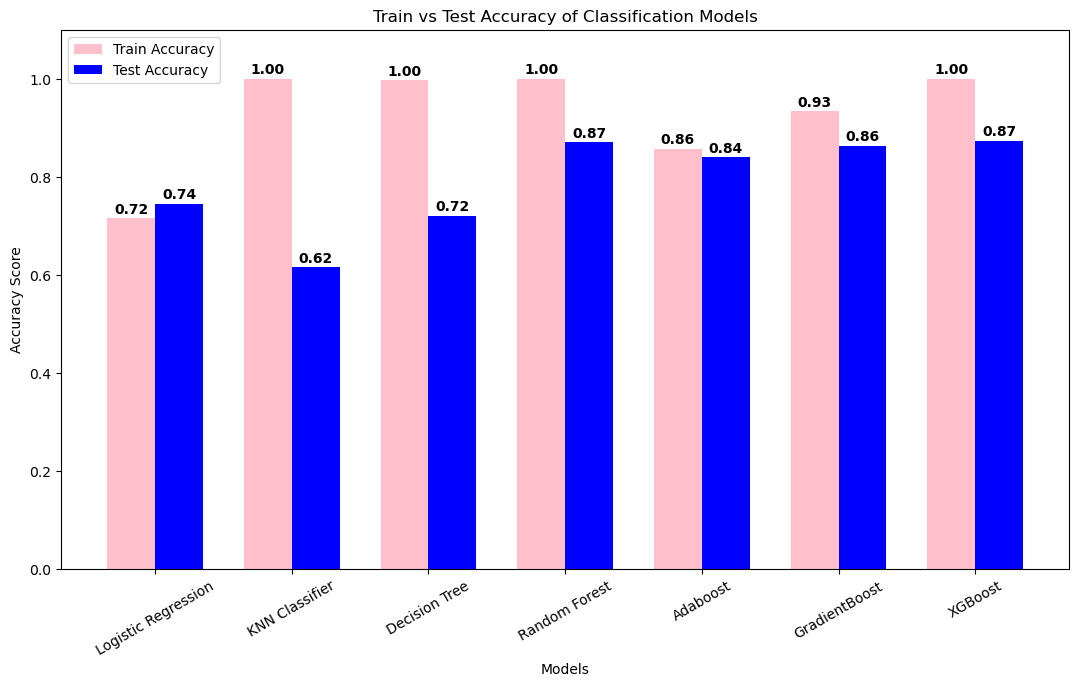

In [507]:
# Model names and classifiers
models = {
    "Logistic Regression": LR,
    "KNN Classifier": KNN,
    "Decision Tree": DT,
    "Random Forest": rf,
    "Adaboost": ABC,
    "GradientBoost": gb,
    "XGBoost": xgb
}

# Compute train & test accuracy
train_accuracy = [accuracy_score(y_train, model.predict(x_train)) for model in models.values()]
test_accuracy = [accuracy_score(y_test, model.predict(x_test)) for model in models.values()]

# Plot
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(13, 7))
plt.bar(x - width/2, train_accuracy, width, label='Train Accuracy', color='pink')
plt.bar(x + width/2, test_accuracy, width, label='Test Accuracy', color='blue')

# Annotate values
for i, (train_acc, test_acc) in enumerate(zip(train_accuracy, test_accuracy)):
    plt.text(x[i] - width/2, train_acc + 0.01, f"{train_acc:.2f}", ha='center', fontweight='bold')
    plt.text(x[i] + width/2, test_acc + 0.01, f"{test_acc:.2f}", ha='center', fontweight='bold')

plt.xticks(x, models.keys(), rotation=30)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Train vs Test Accuracy of Classification Models')
plt.ylim(0, 1.1)
plt.legend()
plt.show()

#### Best Models for Production Use
    Random Forest, GradientBoost, and XGBoost are top performers.
    
    All show high test accuracy, indicating they generalize well on unseen data.
    
    GradientBoost seems best balanced (less overfitting, strong test accuracy).
__________
#### Models to Avoid
    KNN: Severe overfitting, poor real-world use.
    
    Decision Tree: High training accuracy but drops on test — classic overfitting